In [17]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# open csv file
df = pd.read_csv("twitter_archive_master.csv")

In [4]:
# check df
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact,jpg_url,img_num,prediction,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,False,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6139.0,32631.0
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,False,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4064.0,24550.0
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,False,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,8455.0,41346.0
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,False,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9154.0,39531.0
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,False,NaN,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595,3046.0,19865.0


In [16]:
# get total counts
p_points = df.shape[0]

# get the max value
max_counts = df["source"].value_counts().max()

# get max propotion
max_prop = max_counts / p_points

print(max_prop)

0.9816132858837485


In [54]:
# generate tickmark location and name
tick_props = np.arange(0, max_prop+0.02, 0.05)

tick_names = ['{:0.2f}'.format(v) for v in tick_props] 

#format tick_props to 3 digits and return list of string ticks = name
['{:0.2f}'.format(v) for v in tick_props]

['0.00',
 '0.05',
 '0.10',
 '0.15',
 '0.20',
 '0.25',
 '0.30',
 '0.35',
 '0.40',
 '0.45',
 '0.50',
 '0.55',
 '0.60',
 '0.65',
 '0.70',
 '0.75',
 '0.80',
 '0.85',
 '0.90',
 '0.95',
 '1.00']

In [27]:
# seaborn color_palette function returns RGB color lists
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [28]:
# get basic blue color
base_color = sns.color_palette()[0]

Text(0, 0.5, 'propotion')

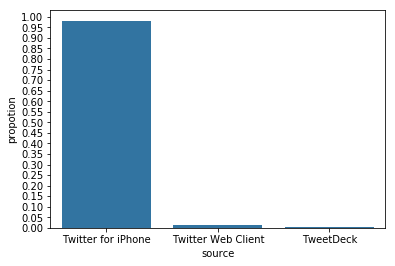

In [55]:
# plot
sns.countplot(data = df, x = "source", color = base_color)

# change the label to %

# plt.yticks(tick_props * p_points) this will get the original tick locations
# plt.yticks(tick_props * p_points, tick_names) this will replace the tick labels with the created relative figures

plt.yticks(tick_props * p_points, tick_names)
plt.ylabel("propotion")

It shows that more than 95% of tweets are posted through iphone app.

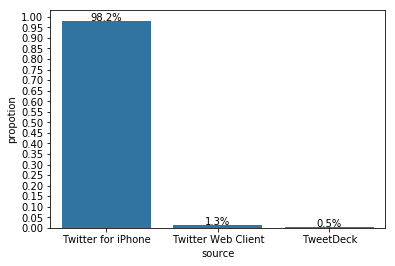

In [81]:


# add anotation
n_points = df.shape[0]
source_counts = df["source"].value_counts()

# get order of sources
source_order = source_counts.index

# create the same plot again
sns.countplot(data = df, x = "source", color = base_color, order = source_order)

# y ticks
plt.yticks(tick_props * p_points, tick_names)
plt.ylabel("propotion")

# loop to add a text
for i in range(source_counts.shape[0]): # get number of sources / number of bars
    count = source_counts[i] # get the position of top of barchart
    pct_string = '{:0.1f}%'.format(count*100 / p_points) # get a text to add
    plt.text(i, count + 1, pct_string, ha="center") # place a text at the x location and y location with centering horizontally 
    
# plt.text(position x, position y, name to annotate, ha or va (horizontal, vertical))

## explanation

In [59]:
# get figures
source_counts

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

In [66]:
# get number of sources
for i in range(source_counts.shape[0]):
    print(i)

0
1
2


In [67]:
source_counts[0]

1655

In [70]:
for i in range(source_counts.shape[0]):
    count = source_counts[i]
    pct_string = '{:0.1f}%'.format(count*100 / p_points)
    print(pct_string)

98.2%
1.3%
0.5%


## hypothesis testing

In [88]:
# get tweet type
tweet_type = df["expanded_urls"].str.split("/").str[-2]

In [90]:
# copy original df
df2 = df.copy()

In [91]:
# add a new column
df2["type"] = tweet_type

In [92]:
# check
df2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,replied,stage,rating_impact,jpg_url,img_num,prediction,confidence,retweet_count,favorite_count,type
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,False,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6139.0,32631.0,photo
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,False,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4064.0,24550.0,photo
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,False,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,8455.0,41346.0,photo
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,False,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9154.0,39531.0,photo
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,False,NaN,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595,3046.0,19865.0,photo


In [94]:
# create group statistic with types
type_mean = df2.groupby("type").mean().retweet_count

In [96]:
# check index
type_mean.index

Index(['photo', 'video'], dtype='object', name='type')

In [100]:
# store mean retweet_count of picture tweets
pic_ret = type_mean[0]

In [102]:
# store mean retweet_count of video tweets
vid_ret = type_mean[1]

In [114]:
# get observed_mean difference
obs_mean_diff = vid_ret - pic_ret
print(obs_mean)

7852.524750265082


## H0 = video - picture <= 0
## H1 = video - picture > 0

In [103]:
# bootstrapping

diffs = []

for _ in range(10000):
    b_samp = df2.sample(df2.shape[0], replace=True)
    pic_mean = b_samp.query('type =="photo"').retweet_count.mean()
    vid_mean = b_samp.query('type =="video"').retweet_count.mean()
    
    diffs.append(vid_mean - pic_mean)

(array([9.700e+01, 8.950e+02, 2.341e+03, 3.092e+03, 2.208e+03, 9.580e+02,
        3.130e+02, 7.900e+01, 1.500e+01, 2.000e+00]),
 array([ 1312.31565536,  3128.52597329,  4944.73629122,  6760.94660916,
         8577.15692709, 10393.36724502, 12209.57756296, 14025.78788089,
        15841.99819882, 17658.20851676, 19474.41883469]),
 <a list of 10 Patch objects>)

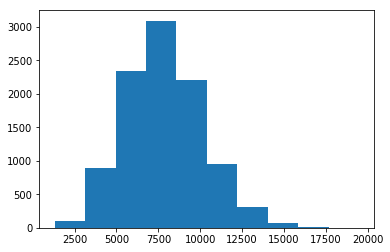

In [104]:
# check histogram
plt.hist(diffs)

In [110]:
# get null_value
null_vals = np.random.normal(0, np.std(diffs), np.size(diffs)) # 0 means here that there is no differences between mean of picture and video
print(null_vals)

[ 1834.18488117   243.25956403  -440.56936986 ... -2895.58944686
 -1161.99126357  -897.23786793]


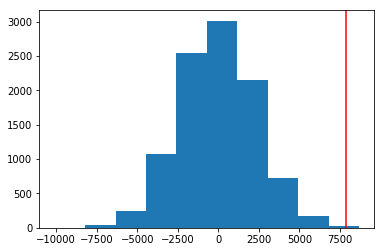

In [115]:
# draw normal distribution based on 0 value
plt.hist(null_vals)
plt.axvline(obs_mean_diff, color="red")

In [118]:
# get p-value
(null_vals > obs_mean_diff).mean()

0.0005

> It shows that we can reject our H0 hypothesis. Therefore, there is high possibility that tweets with video is more likely to be retweeted.